In [1]:
import pandas as pd
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math
from functools import reduce
import matplotlib 
import gpplot as gpp 
gpp.set_aesthetics(context = 'paper')

In [2]:
file_path = "../../Data/primaryLibrary/"
figure1_outpath = '../../Figures/Figure 1/'

In [3]:
merged_df = pd.read_csv(file_path + "inHouseDatasetsCombined.csv")

In [4]:
def averaged_gene_z_scores_single_column(genes, z_scores):
    gene_scores = {}
    combined_scores = {}

    # Group z-scores by gene
    for gene, score in zip(genes, z_scores):
        if gene in gene_scores:
            gene_scores[gene].append(score)
        else:
            gene_scores[gene] = [score]

    # Calculate average z-score for each gene
    for gene, scores in gene_scores.items():
        combined_score = np.sum(scores) / len(scores)
        combined_scores[gene] = combined_score

    return combined_scores

In [5]:
# Calculate average z-scores and save it into a dict
combined_gene_z_scores_A549_Zim3 = averaged_gene_z_scores_single_column(merged_df['Target Gene Symbol'], 
                                                                      merged_df['z_scored_avg_lfc_A549_Zim3'])
combined_gene_z_scores_A549_Kox1 = averaged_gene_z_scores_single_column(merged_df['Target Gene Symbol'], 
                                                                      merged_df['z_scored_avg_lfc_A549_Kox1'])
combined_gene_z_scores_HCT116_Zim3 = averaged_gene_z_scores_single_column(merged_df['Target Gene Symbol'], 
                                                                      merged_df['z_scored_avg_lfc_HCT116_Zim3'])
combined_gene_z_scores_HCT116_Kox1 = averaged_gene_z_scores_single_column(merged_df['Target Gene Symbol'], 
                                                                      merged_df['z_scored_avg_lfc_HCT116_Kox1'])


# translate dicts into dataframes
combined_gene_z_scores_A549_Zim3 = pd.DataFrame(combined_gene_z_scores_A549_Zim3.items(), columns=['Target Gene Symbol', 'z_scored_avg_lfc_A549_Zim3'])             
combined_gene_z_scores_A549_Kox1 = pd.DataFrame(combined_gene_z_scores_A549_Kox1.items(), columns=['Target Gene Symbol', 'z_scored_avg_lfc_A549_Kox1'])             
combined_gene_z_scores_HCT116_Zim3 = pd.DataFrame(combined_gene_z_scores_HCT116_Zim3.items(), columns=['Target Gene Symbol', 'z_scored_avg_lfc_HCT116_Zim3'])             
combined_gene_z_scores_HCT116_Kox1 = pd.DataFrame(combined_gene_z_scores_HCT116_Kox1.items(), columns=['Target Gene Symbol', 'z_scored_avg_lfc_HCT116_Kox1'])             

# combine averaged z-scores in all screens into one dataframe
combined_gene_z_scores = reduce(lambda left, right: pd.merge(left, right, on='Target Gene Symbol', how='inner'), 
                                [combined_gene_z_scores_A549_Zim3, combined_gene_z_scores_A549_Kox1, combined_gene_z_scores_HCT116_Zim3, combined_gene_z_scores_HCT116_Kox1])
             
combined_gene_z_scores.head()   

,Target Gene Symbol,z_scored_avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Kox1,z_scored_avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,0.264249,0.093926,0.116008,0.125713
1,COPS3,-1.118453,-0.863480,-1.242961,-1.414997
2,RSRC2,-0.361538,-0.290034,-1.687318,-1.788140
3,ADSL,-1.354587,-0.795711,-1.972559,-2.318961
4,CYP7A1,-0.013117,-0.058952,-0.097697,0.117889


In [6]:
#merge combined z-scores with original df to obtain essentiality of each gene
combined_gene_z_scores = pd.merge(merged_df[['Target Gene Symbol','Category']].drop_duplicates(), 
         combined_gene_z_scores, 
         on = 'Target Gene Symbol', how = 'right')
combined_gene_z_scores.head()

,Target Gene Symbol,Category,z_scored_avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Kox1,z_scored_avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,Non-essential,0.264249,0.093926,0.116008,0.125713
1,COPS3,Essential,-1.118453,-0.863480,-1.242961,-1.414997
2,RSRC2,Essential,-0.361538,-0.290034,-1.687318,-1.788140
3,ADSL,Essential,-1.354587,-0.795711,-1.972559,-2.318961
4,CYP7A1,Non-essential,-0.013117,-0.058952,-0.097697,0.117889


In [7]:
combined_gene_z_scores.to_csv(file_path + "Datasets_Combined_Gene_Average_Zscores.csv")

In [8]:
# only genes information no controls
selected_combined_gene_z_scores = combined_gene_z_scores[~combined_gene_z_scores['Target Gene Symbol'].str.startswith('NO_SITE') & \
                                                         ~combined_gene_z_scores['Target Gene Symbol'].str.startswith('ONE_INTERGENIC')]


In [9]:
selected_combined_gene_z_scores.head()

,Target Gene Symbol,Category,z_scored_avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Kox1,z_scored_avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,Non-essential,0.264249,0.093926,0.116008,0.125713
1,COPS3,Essential,-1.118453,-0.863480,-1.242961,-1.414997
2,RSRC2,Essential,-0.361538,-0.290034,-1.687318,-1.788140
3,ADSL,Essential,-1.354587,-0.795711,-1.972559,-2.318961
4,CYP7A1,Non-essential,-0.013117,-0.058952,-0.097697,0.117889


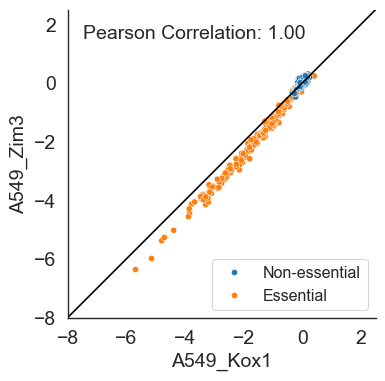

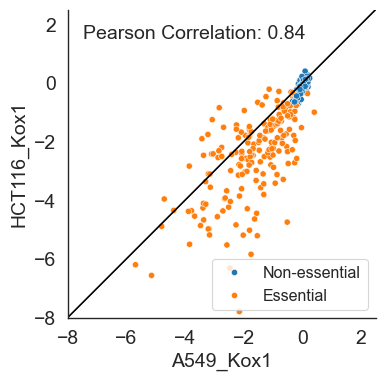

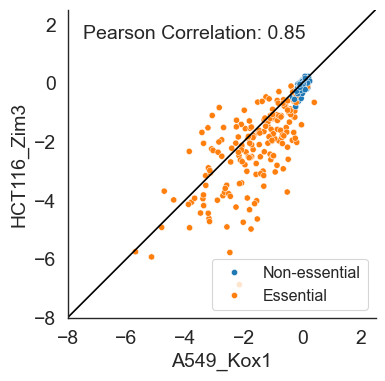

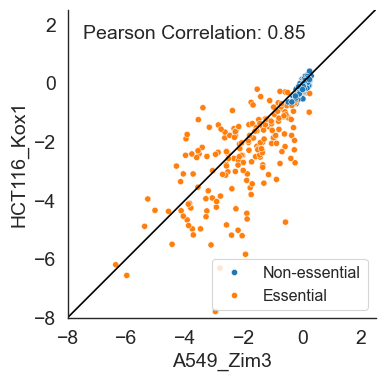

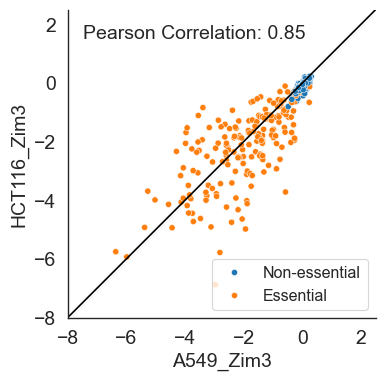

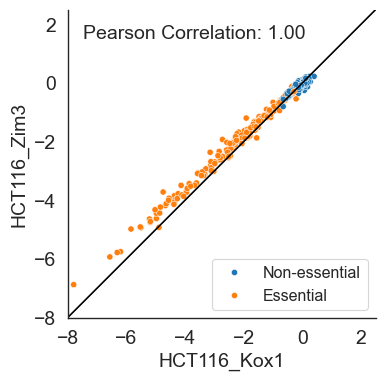

In [10]:
sns.set_style("white")
sns.set_context("paper")

# list of all columns to plot
columns = ['z_scored_avg_lfc_A549_Kox1', 'z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_HCT116_Kox1', 'z_scored_avg_lfc_HCT116_Zim3']

# create scatter plots for each pair
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(4, 4))
        ax = sns.scatterplot(x=columns[i], y=columns[j], data=selected_combined_gene_z_scores, hue = 'Category',
                             palette = {'Non-essential':'#1f77b4','Essential':'#ff7f0e'},s=20)
        sns.despine()
        # Calculate Pearson correlation
        corr = selected_combined_gene_z_scores[[columns[i], columns[j]]].corr(method = 'pearson').iloc[0, 1]
        
        # Plot title with correlation
        plt.text(0.05, 0.95, f'Pearson Correlation: {corr:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
        x_label = columns[i].split('_')[4] + '_' + columns[i].split('_')[5]
        y_label = columns[j].split('_')[4] + '_' + columns[j].split('_')[5]
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)

        
       
        plt.legend(loc='lower right', fontsize='large')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        ax.set_xlim(-8, 2.5)
        #ax.set_xlim(-110, 20)
        ax.set_ylim(-8, 2.5)
        #ax.set_ylim(-110, 20)
        ax.set_aspect('equal')
        ax.plot([0,1],[0,1], transform=ax.transAxes,color = 'black')

        figure_name = f'Gene_Scatter_{x_label}_vs_{y_label}.pdf'
        gpp.savefig(figure1_outpath + figure_name, format='pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)